In [114]:
#scatter plot n-m with mu=size and color=various solution(per far vedere che non cambia a seconda di m e n)
#bar plot mu-nonZero with color=various solution(per far vedere che cambia a seconda di nonZero)
#tebelle che fanno vedere i risultati delle varie soluzioni per uno o più esempi
#più bar blot insieme per confrontare ogni soluzione per vari nonZero con la soluzione COO5 (vedere che batte tutte)
#confrontare la miglior e peggior soluzione della gpu con quella della Cpu al variare fi nonZeroes con un bar plot con color=soluzione.
#rifare il grafico della roofline con la migior soluzione e peggior soluzione gpu
#confrontare le varie soluzione tra sortR e sort C
#confrontare le varie soluzioni con la corrispettiva versione senza trasform

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
data = pd.read_csv('GPU/test/GPU_test_Complete.csv')
dataC = pd.read_csv('CPU/test/CPU_test_Complete.csv')
fields_to_plot = ["BenElechi1.mtx", "degme.mtx", "Cities.mtx", "Hardesty2.mtx", "mawi_201512012345.mtx","rail4284.mtx","specular.mtx","t2em.mtx","torso1.mtx"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500','pink']

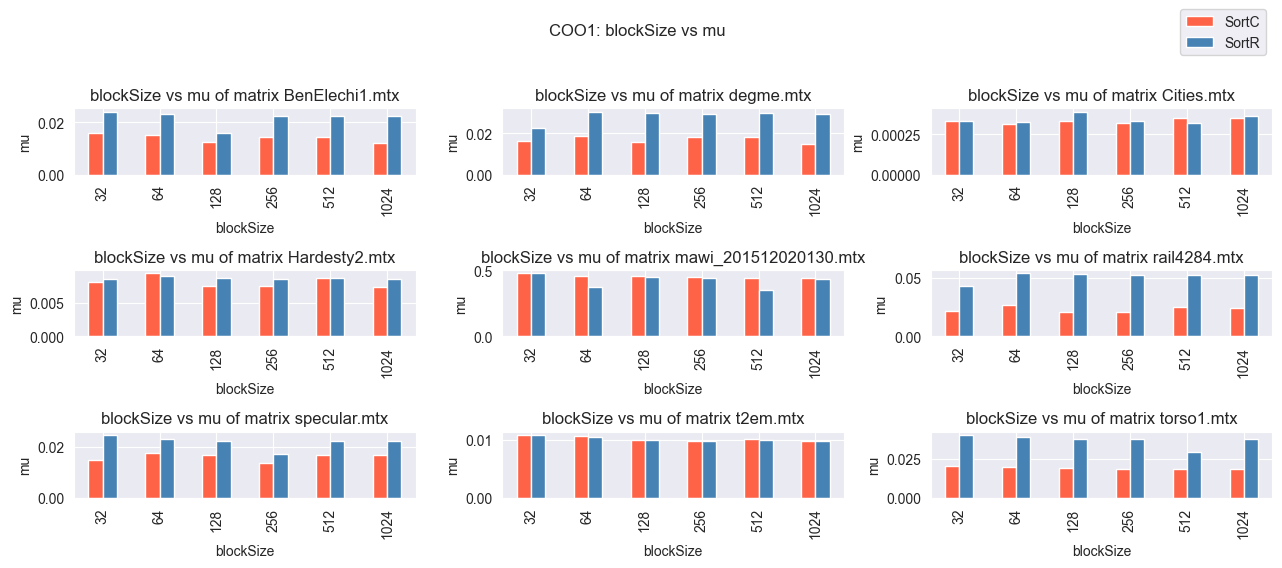

In [117]:
dfo = pd.DataFrame(data)
dfo = dfo[dfo["id"] == "COO1"]
#print(df)


#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)

fig, axes = plt.subplots(3, 3, figsize=(30, 12))


for ax, field in zip(axes.flatten(), fields_to_plot):
    df = dfo[dfo["matrix"] == field]
    pivot_df = df.pivot_table(index="blockSize", columns="sort", values="mu",
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    ax.set_title(f"blockSize vs mu of matrix {field}")
    ax.set_xlabel("blockSize")
    ax.set_ylabel("mu")
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO1: blockSize vs mu",y=1.1)
plt.legend(bbox_to_anchor=(0.001, 6.5, 1, 1))
plt.show()

In [118]:
ResultCOO1 = {}
for field in fields_to_plot:
    df = dfo[dfo["matrix"] == field]
    df = df[df.mu == df.mu.min()]
    ResultCOO1[field] = {"sort":df["sort"].iloc[0],"blockSize":int(df["blockSize"].iloc[0]),"mu":float(df["mu"].iloc[0]),"nMemAc":int(df["nMemAc"].iloc[0]),"AI":float(df["AI"].iloc[0]),"Iperf":float(df["Iperf"].iloc[0]),"flops":float(df["flops"].iloc[0]),"effBand":float(df["effBand"].iloc[0])}
    #print(f'matrix {field}, sort {df["sort"].iloc[0]}, blockSize {df["blockSize"].iloc[0]}')

print(ResultCOO1)




{'BenElechi1.mtx': {'sort': 'SortC', 'blockSize': 1024, 'mu': 0.012175, 'nMemAc': 214341920, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 1.100309, 'effBand': 17.604941}, 'degme.mtx': {'sort': 'SortC', 'blockSize': 1024, 'mu': 0.014684, 'nMemAc': 260080896, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 1.106953, 'effBand': 17.711253}, 'Cities.mtx': {'sort': 'SortC', 'blockSize': 64, 'mu': 0.000311, 'nMemAc': 42944, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 0.008625, 'effBand': 0.137995}, 'Hardesty2.mtx': {'sort': 'SortC', 'blockSize': 1024, 'mu': 0.007328, 'nMemAc': 128663392, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 1.097391, 'effBand': 17.558257}, 'mawi_201512020130.mtx': {'sort': 'SortR', 'blockSize': 512, 'mu': 0.350985, 'nMemAc': 28790144, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 0.769933, 'effBand': 0.082027}, 'rail4284.mtx': {'sort': 'SortC', 'blockSize': 128, 'mu': 0.02045, 'nMemAc': 361089024, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 1.103562, 'effBand': 17.656992}, 'specular.mtx': {'so

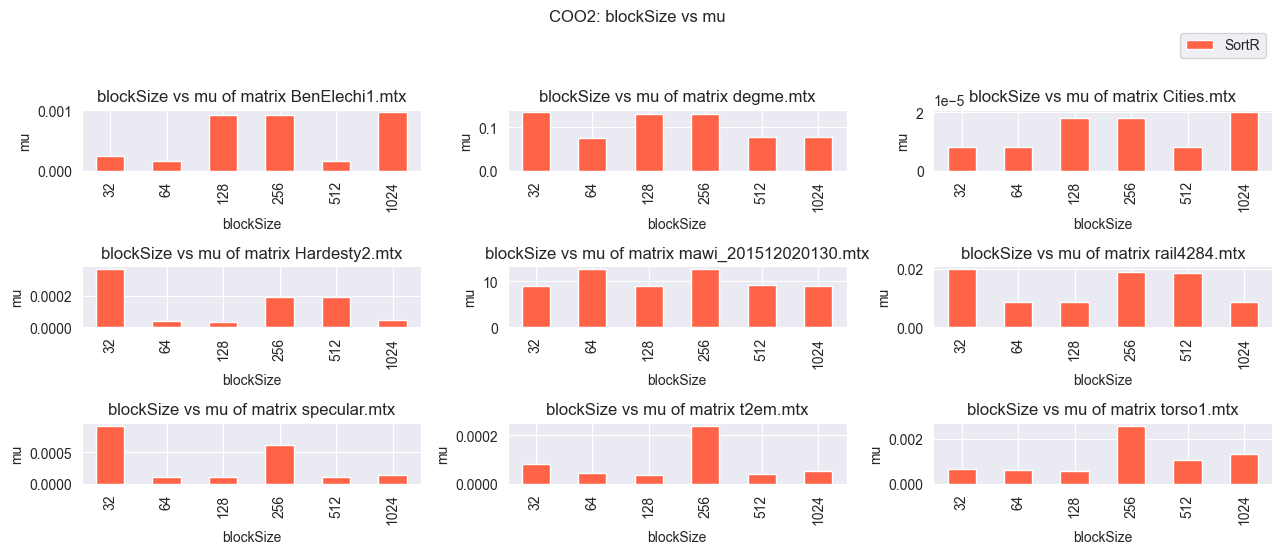

In [119]:
dfo = pd.DataFrame(data)
dfo = dfo[dfo["id"] == "COO2"]
#print(df)


#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)

fig, axes = plt.subplots(3, 3, figsize=(30, 12))


for ax, field in zip(axes.flatten(), fields_to_plot):
    df = dfo[dfo["matrix"] == field]
    pivot_df = df.pivot_table(index="blockSize", columns="sort", values="mu",
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    ax.set_title(f"blockSize vs mu of matrix {field}")
    ax.set_xlabel("blockSize")
    ax.set_ylabel("mu")
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO2: blockSize vs mu",y=1.1)
plt.legend(bbox_to_anchor=(0.001, 6.5, 1, 1))
plt.show()

In [120]:
ResultCOO2 = {}
for field in fields_to_plot:
    df = dfo[dfo["matrix"] == field]
    df = df[df.mu == df.mu.min()]
    ResultCOO2[field] = {"sort":df["sort"].iloc[0],"blockSize":int(df["blockSize"].iloc[0]),"mu":float(df["mu"].iloc[0]),"nMemAc":int(df["nMemAc"].iloc[0]),"AI":float(df["AI"].iloc[0]),"Iperf":float(df["Iperf"].iloc[0]),"flops":float(df["flops"].iloc[0]),"effBand":float(df["effBand"].iloc[0])}
    #print(f'matrix {field}, sort {df["sort"].iloc[0]}, blockSize {df["blockSize"].iloc[0]}')

print(ResultCOO2)

{'BenElechi1.mtx': {'sort': 'SortR', 'blockSize': 64, 'mu': 0.000157, 'nMemAc': 162723424, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 85.352423, 'effBand': 1036.761345}, 'degme.mtx': {'sort': 'SortR', 'blockSize': 64, 'mu': 0.076418, 'nMemAc': 196544672, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 0.212714, 'effBand': 2.571983}, 'Cities.mtx': {'sort': 'SortR', 'blockSize': 32, 'mu': 8e-06, 'nMemAc': 32640, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 0.327637, 'effBand': 3.984375}, 'Hardesty2.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 3.1e-05, 'nMemAc': 103936744, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 255.303959, 'effBand': 3299.830578}, 'mawi_201512020130.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 9.052408, 'nMemAc': 4271367912, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 0.029852, 'effBand': 0.471849}, 'rail4284.mtx': {'sort': 'SortR', 'blockSize': 64, 'mu': 0.008537, 'nMemAc': 270851032, 'AI': 0.0625, 'Iperf': 58.3125, 'flops': 2.643454, 'effBand': 31.725456}, 'specular.mtx': {'sor

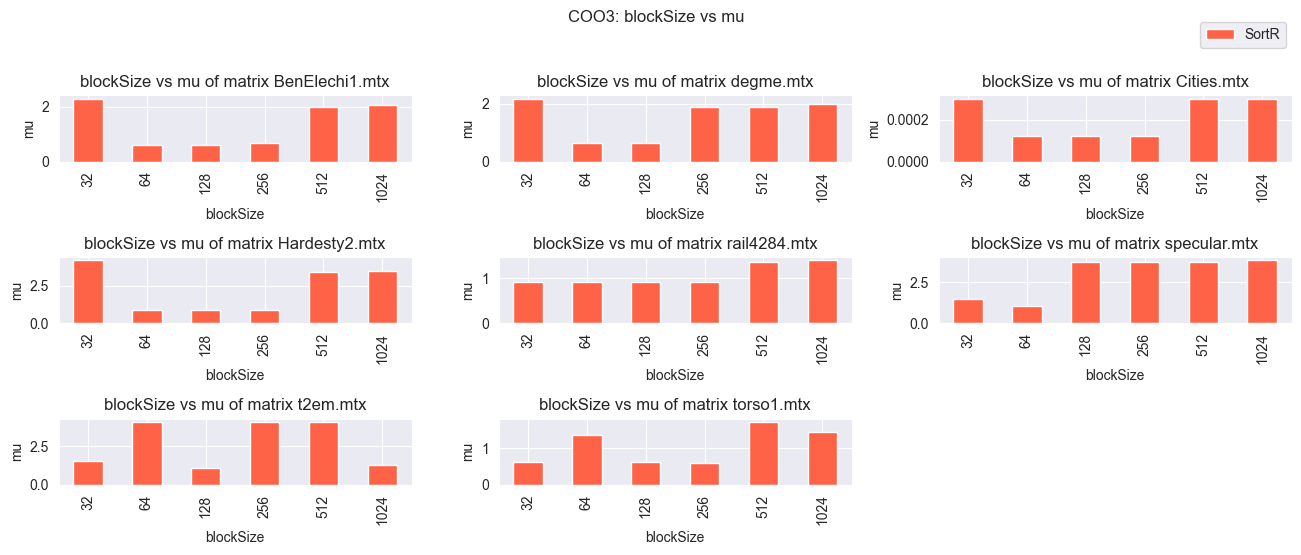

In [121]:
dfo = pd.DataFrame(data)
dfo = dfo[dfo["id"] == "COO3"]
#print(df)

fields_to_plotCOO3 = ["BenElechi1.mtx", "degme.mtx", "Cities.mtx", "Hardesty2.mtx","rail4284.mtx","specular.mtx","t2em.mtx","torso1.mtx"]
#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)

fig, axes = plt.subplots(3, 3, figsize=(30, 12))

fig.delaxes(axes[2,2])

for ax, field in zip(axes.flatten(), fields_to_plotCOO3):
    df = dfo[dfo["matrix"] == field]
    pivot_df = df.pivot_table(index="blockSize", columns="sort", values="mu",
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    ax.set_title(f"blockSize vs mu of matrix {field}")
    ax.set_xlabel("blockSize")
    ax.set_ylabel("mu")
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO3: blockSize vs mu",y=1.1)
plt.legend(bbox_to_anchor=(1.25, 6.1, 1, 1))
plt.show()

In [122]:
ResultCOO3 = {}
for field in fields_to_plotCOO3:
    df = dfo[dfo["matrix"] == field]
    df = df[df.mu == df.mu.min()]
    ResultCOO3[field] = {"sort":df["sort"].iloc[0],"blockSize":int(df["blockSize"].iloc[0]),"mu":float(df["mu"].iloc[0]),"nMemAc":int(df["nMemAc"].iloc[0]),"AI":float(df["AI"].iloc[0]),"Iperf":float(df["Iperf"].iloc[0]),"flops":float(df["flops"].iloc[0]),"effBand":float(df["effBand"].iloc[0])}
    #print(f'matrix {field}, sort {df["sort"].iloc[0]}, blockSize {df["blockSize"].iloc[0]}')

print(ResultCOO3)

{'BenElechi1.mtx': {'sort': 'SortR', 'blockSize': 64, 'mu': 0.606386, 'nMemAc': 3967282884, 'AI': 0.1, 'Iperf': 93.3, 'flops': 0.022092, 'effBand': 6.542507}, 'degme.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 0.630531, 'nMemAc': 2451761464, 'AI': 0.1, 'Iperf': 93.3, 'flops': 0.02578, 'effBand': 3.888408}, 'Cities.mtx': {'sort': 'SortR', 'blockSize': 64, 'mu': 0.00012, 'nMemAc': 4231478332, 'AI': 0.1, 'Iperf': 93.3, 'flops': 0.022459, 'effBand': 35407.726644}, 'Hardesty2.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 0.892137, 'nMemAc': 51968348, 'AI': 0.1, 'Iperf': 93.3, 'flops': 0.009014, 'effBand': 0.058252}, 'rail4284.mtx': {'sort': 'SortR', 'blockSize': 32, 'mu': 0.905379, 'nMemAc': 667522432, 'AI': 0.1, 'Iperf': 93.3, 'flops': 0.024927, 'effBand': 0.737285}, 'specular.mtx': {'sort': 'SortR', 'blockSize': 64, 'mu': 1.058914, 'nMemAc': 93683224, 'AI': 0.1, 'Iperf': 93.3, 'flops': 0.014444, 'effBand': 0.088471}, 't2em.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 1.062734, 'n

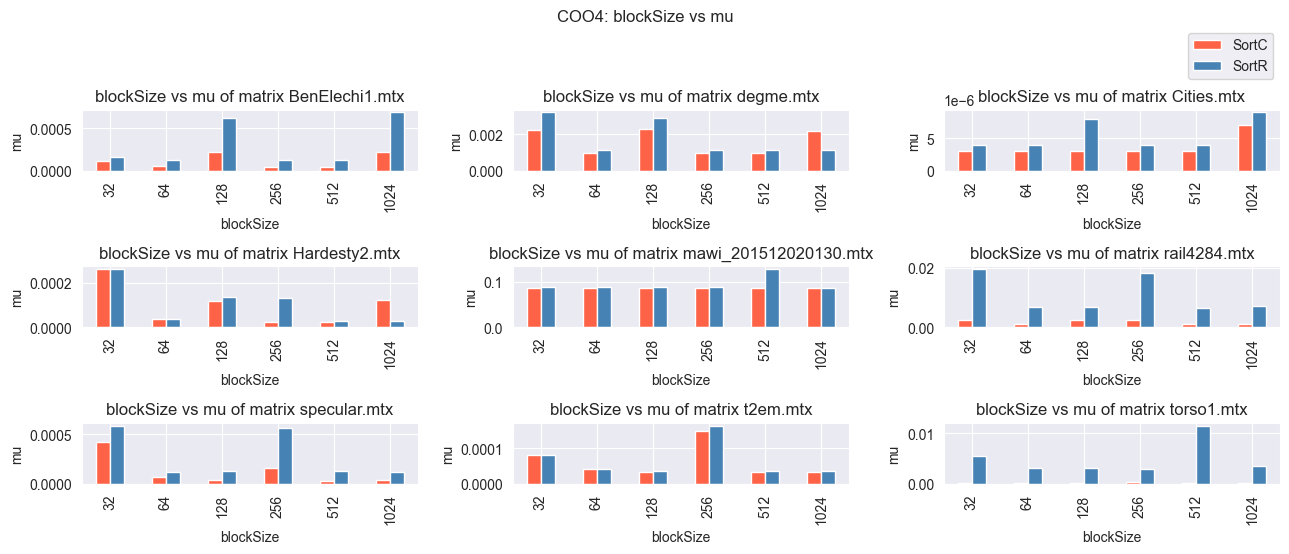

In [123]:
dfo = pd.DataFrame(data)
dfo = dfo[dfo["id"] == "COO4"]
#print(df)


#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)

fig, axes = plt.subplots(3, 3, figsize=(30, 12))


for ax, field in zip(axes.flatten(), fields_to_plot):
    df = dfo[dfo["matrix"] == field]
    pivot_df = df.pivot_table(index="blockSize", columns="sort", values="mu",
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    ax.set_title(f"blockSize vs mu of matrix {field}")
    ax.set_xlabel("blockSize")
    ax.set_ylabel("mu")
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO4: blockSize vs mu",y=1.1)
plt.legend(bbox_to_anchor=(0.001, 6.5, 1, 1))
plt.show()

In [124]:
ResultCOO4 = {}
for field in fields_to_plot:
    df = dfo[dfo["matrix"] == field]
    df = df[df.mu == df.mu.min()]
    ResultCOO4[field] = {"sort":df["sort"].iloc[0],"blockSize":int(df["blockSize"].iloc[0]),"mu":float(df["mu"].iloc[0]),"nMemAc":int(df["nMemAc"].iloc[0]),"AI":float(df["AI"].iloc[0]),"Iperf":float(df["Iperf"].iloc[0]),"flops":float(df["flops"].iloc[0]),"effBand":float(df["effBand"].iloc[0])}
    #print(f'matrix {field}, sort {df["sort"].iloc[0]}, blockSize {df["blockSize"].iloc[0]}')

print(ResultCOO4)

{'BenElechi1.mtx': {'sort': 'SortC', 'blockSize': 256, 'mu': 4.3e-05, 'nMemAc': 160756440, 'AI': 0.083333, 'Iperf': 77.75, 'flops': 311.996244, 'effBand': 3743.954928}, 'degme.mtx': {'sort': 'SortC', 'blockSize': 512, 'mu': 0.00095, 'nMemAc': 195060672, 'AI': 0.083333, 'Iperf': 77.75, 'flops': 17.110989, 'effBand': 205.331865}, 'Cities.mtx': {'sort': 'SortC', 'blockSize': 32, 'mu': 3e-06, 'nMemAc': 32208, 'AI': 0.083333, 'Iperf': 77.75, 'flops': 0.808824, 'effBand': 9.705882}, 'Hardesty2.mtx': {'sort': 'SortC', 'blockSize': 256, 'mu': 2.5e-05, 'nMemAc': 96497544, 'AI': 0.083333, 'Iperf': 77.75, 'flops': 326.358037, 'effBand': 3916.29645}, 'mawi_201512020130.mtx': {'sort': 'SortC', 'blockSize': 1024, 'mu': 0.085148, 'nMemAc': 3242818080, 'AI': 0.083333, 'Iperf': 77.75, 'flops': 3.17371, 'effBand': 38.084515}, 'rail4284.mtx': {'sort': 'SortC', 'blockSize': 512, 'mu': 0.001043, 'nMemAc': 270816768, 'AI': 0.083333, 'Iperf': 77.75, 'flops': 21.641596, 'effBand': 259.699156}, 'specular.mtx':

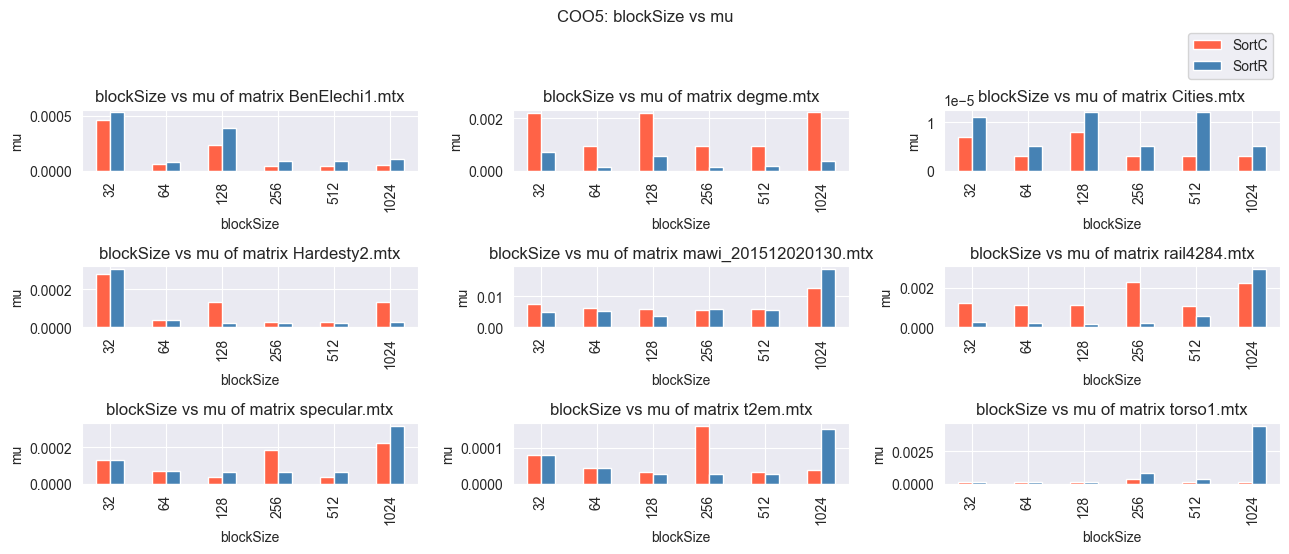

In [125]:
dfo = pd.DataFrame(data)
dfo = dfo[dfo["id"] == "COO5"]
#print(df)


#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)

fig, axes = plt.subplots(3, 3, figsize=(30, 12))


for ax, field in zip(axes.flatten(), fields_to_plot):
    df = dfo[dfo["matrix"] == field]
    pivot_df = df.pivot_table(index="blockSize", columns="sort", values="mu",
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    ax.set_title(f"blockSize vs mu of matrix {field}")
    ax.set_xlabel("blockSize")
    ax.set_ylabel("mu")
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO5: blockSize vs mu",y=1.1)
plt.legend(bbox_to_anchor=(0.001, 6.5, 1, 1))
plt.show()

In [126]:
ResultCOO5 = {}
for field in fields_to_plot:
    df = dfo[dfo["matrix"] == field]
    df = df[df.mu == df.mu.min()]
    ResultCOO5[field] = {"sort":df["sort"].iloc[0],"blockSize":int(df["blockSize"].iloc[0]),"mu":float(df["mu"].iloc[0]),"nMemAc":int(df["nMemAc"].iloc[0]),"AI":float(df["AI"].iloc[0]),"Iperf":float(df["Iperf"].iloc[0]),"flops":float(df["flops"].iloc[0]),"effBand":float(df["effBand"].iloc[0])}
    #print(f'matrix {field}, sort {df["sort"].iloc[0]}, blockSize {df["blockSize"].iloc[0]}')

print(ResultCOO5)

{'BenElechi1.mtx': {'sort': 'SortC', 'blockSize': 256, 'mu': 4.4e-05, 'nMemAc': 161017488, 'AI': 0.1, 'Iperf': 93.3, 'flops': 301.633088, 'effBand': 3625.474824}, 'degme.mtx': {'sort': 'SortR', 'blockSize': 64, 'mu': 0.000122, 'nMemAc': 132777768, 'AI': 0.1, 'Iperf': 93.3, 'flops': 132.788859, 'effBand': 1084.672256}, 'Cities.mtx': {'sort': 'SortC', 'blockSize': 64, 'mu': 3e-06, 'nMemAc': 293168, 'AI': 0.1, 'Iperf': 93.3, 'flops': 0.818293, 'effBand': 89.380485}, 'Hardesty2.mtx': {'sort': 'SortR', 'blockSize': 256, 'mu': 2.2e-05, 'nMemAc': 72147536, 'AI': 0.1, 'Iperf': 93.3, 'flops': 361.368551, 'effBand': 3242.177919}, 'mawi_201512020130.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 0.003537, 'nMemAc': 2724055320, 'AI': 0.1, 'Iperf': 93.3, 'flops': 76.406109, 'effBand': 770.1985}, 'rail4284.mtx': {'sort': 'SortR', 'blockSize': 128, 'mu': 0.000188, 'nMemAc': 181545760, 'AI': 0.1, 'Iperf': 93.3, 'flops': 119.944898, 'effBand': 964.88062}, 'specular.mtx': {'sort': 'SortC', 'blockSize':

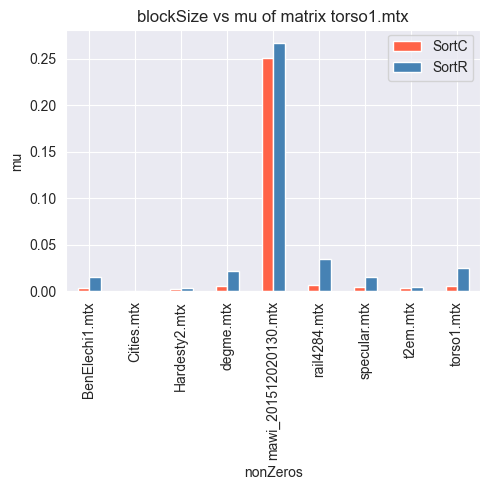

In [127]:
dfo = pd.DataFrame(dataC)
df = dfo

#print(df)


#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)

df = df[df["matrix"] != "Random"]

pivot_df = df.pivot_table(index="matrix", columns="sort", values="mu",
                 aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                 fill_value=0)
#sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
pivot_df.plot(kind="bar", figsize=(5, 5), color=colors)
plt.title(f"blockSize vs mu of matrix {field}")
plt.xlabel("nonZeros")
plt.ylabel("mu")
plt.legend().remove()

plt.tight_layout()
fig.suptitle("CPU: blockSize vs mu",y=1.1)
plt.legend(bbox_to_anchor=(0.001, 0.01, 1, 1))
plt.show()

In [128]:
ResultCPU = {}
for field in fields_to_plot:
    df = dfo[dfo["matrix"] == field]
    df = df[df.mu == df.mu.min()]
    ResultCPU[field] = {"sort":df["sort"].iloc[0],"mu":float(df["mu"].iloc[0]),"nMemAc":int(df["nMemAc"].iloc[0]),"flops":float(df["flops"].iloc[0]),"effBand":float(df["effBand"].iloc[0])}
    #print(f'matrix {field}, sort {df["sort"].iloc[0]}, blockSize {df["blockSize"].iloc[0]}')

print(ResultCPU)

{'BenElechi1.mtx': {'sort': 'SortC', 'mu': 0.004018, 'nMemAc': 160756440, 'flops': 3.334006, 'effBand': 40.008073}, 'degme.mtx': {'sort': 'SortC', 'mu': 0.005543, 'nMemAc': 195060672, 'flops': 2.932273, 'effBand': 35.187277}, 'Cities.mtx': {'sort': 'SortC', 'mu': 1e-06, 'nMemAc': 32208, 'flops': 2.684, 'effBand': 32.208}, 'Hardesty2.mtx': {'sort': 'SortC', 'mu': 0.002611, 'nMemAc': 96497544, 'flops': 3.079486, 'effBand': 36.953833}, 'mawi_201512020130.mtx': {'sort': 'SortC', 'mu': 0.250531, 'nMemAc': 3242818080, 'flops': 1.078649, 'effBand': 12.943785}, 'rail4284.mtx': {'sort': 'SortC', 'mu': 0.006835, 'nMemAc': 270816768, 'flops': 3.301935, 'effBand': 39.623218}, 'specular.mtx': {'sort': 'SortC', 'mu': 0.005161, 'nMemAc': 183542784, 'flops': 2.963733, 'effBand': 35.564793}, 't2em.mtx': {'sort': 'SortC', 'mu': 0.003477, 'nMemAc': 110179968, 'flops': 2.640458, 'effBand': 31.685494}, 'torso1.mtx': {'sort': 'SortC', 'mu': 0.005521, 'nMemAc': 204396000, 'flops': 3.085297, 'effBand': 37.023

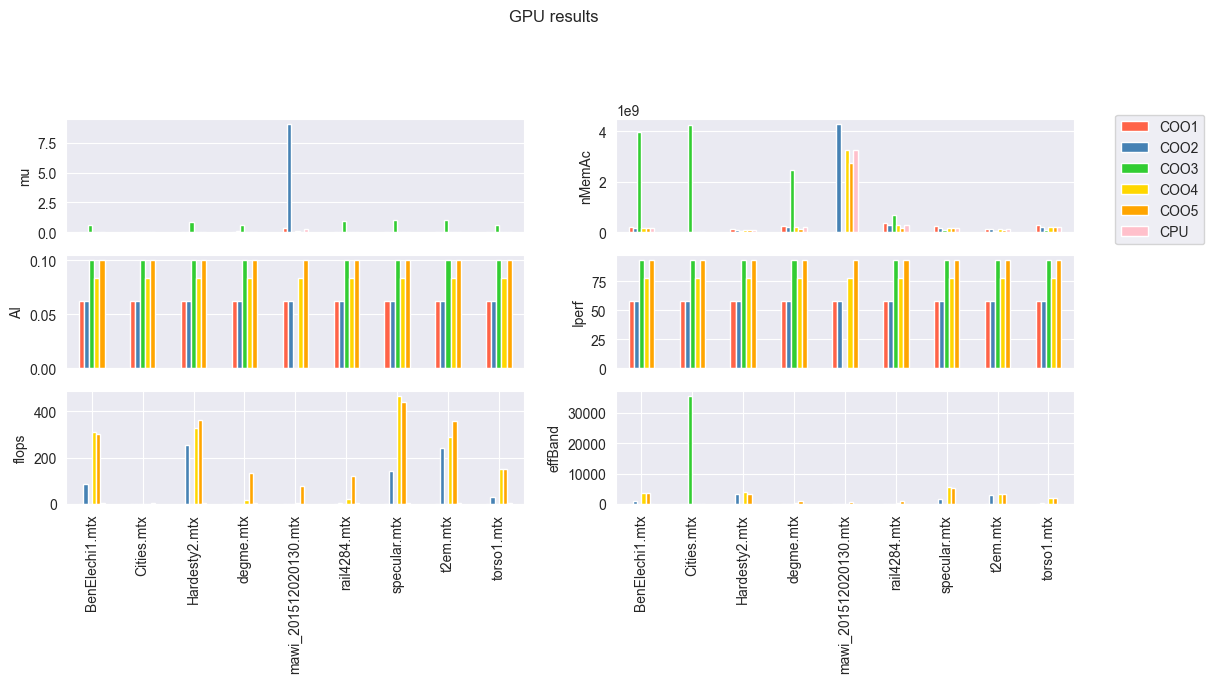

In [129]:

Results = {"id":[],"matrix":[],"sort":[],"blockSize":[],"mu":[],"nMemAc":[],"AI":[],"Iperf":[],"flops":[],"effBand":[]}

for matrix in ResultCOO1:
    Results["id"].append("COO1")
    Results["matrix"].append(matrix)
    Results["sort"].append(ResultCOO1[matrix]["sort"])
    Results["blockSize"].append(ResultCOO1[matrix]["blockSize"])
    Results["mu"].append(ResultCOO1[matrix]["mu"])
    Results["nMemAc"].append(ResultCOO1[matrix]["nMemAc"])
    Results["AI"].append(ResultCOO1[matrix]["AI"])
    Results["Iperf"].append(ResultCOO1[matrix]["Iperf"])
    Results["flops"].append(ResultCOO1[matrix]["flops"])
    Results["effBand"].append(ResultCOO1[matrix]["effBand"])

for matrix in ResultCOO2:
    Results["id"].append("COO2")
    Results["matrix"].append(matrix)
    Results["sort"].append(ResultCOO2[matrix]["sort"])
    Results["blockSize"].append(ResultCOO2[matrix]["blockSize"])
    Results["mu"].append(ResultCOO2[matrix]["mu"])
    Results["nMemAc"].append(ResultCOO2[matrix]["nMemAc"])
    Results["AI"].append(ResultCOO2[matrix]["AI"])
    Results["Iperf"].append(ResultCOO2[matrix]["Iperf"])
    Results["flops"].append(ResultCOO2[matrix]["flops"])
    Results["effBand"].append(ResultCOO2[matrix]["effBand"])

for matrix in ResultCOO3:
    Results["id"].append("COO3")
    Results["matrix"].append(matrix)
    Results["sort"].append(ResultCOO3[matrix]["sort"])
    Results["blockSize"].append(ResultCOO3[matrix]["blockSize"])
    Results["mu"].append(ResultCOO3[matrix]["mu"])
    Results["nMemAc"].append(ResultCOO3[matrix]["nMemAc"])
    Results["AI"].append(ResultCOO3[matrix]["AI"])
    Results["Iperf"].append(ResultCOO3[matrix]["Iperf"])
    Results["flops"].append(ResultCOO3[matrix]["flops"])
    Results["effBand"].append(ResultCOO3[matrix]["effBand"])

for matrix in ResultCOO4:
    Results["id"].append("COO4")
    Results["matrix"].append(matrix)
    Results["sort"].append(ResultCOO4[matrix]["sort"])
    Results["blockSize"].append(ResultCOO4[matrix]["blockSize"])
    Results["mu"].append(ResultCOO4[matrix]["mu"])
    Results["nMemAc"].append(ResultCOO4[matrix]["nMemAc"])
    Results["AI"].append(ResultCOO4[matrix]["AI"])
    Results["Iperf"].append(ResultCOO4[matrix]["Iperf"])
    Results["flops"].append(ResultCOO4[matrix]["flops"])
    Results["effBand"].append(ResultCOO4[matrix]["effBand"])

for matrix in ResultCOO5:
    Results["id"].append("COO5")
    Results["matrix"].append(matrix)
    Results["sort"].append(ResultCOO5[matrix]["sort"])
    Results["blockSize"].append(ResultCOO5[matrix]["blockSize"])
    Results["mu"].append(ResultCOO5[matrix]["mu"])
    Results["nMemAc"].append(ResultCOO5[matrix]["nMemAc"])
    Results["AI"].append(ResultCOO5[matrix]["AI"])
    Results["Iperf"].append(ResultCOO5[matrix]["Iperf"])
    Results["flops"].append(ResultCOO5[matrix]["flops"])
    Results["effBand"].append(ResultCOO5[matrix]["effBand"])

for matrix in ResultCPU:
    Results["id"].append("CPU")
    Results["matrix"].append(matrix)
    Results["sort"].append("Null")
    Results["blockSize"].append(0)
    Results["mu"].append(ResultCPU[matrix]["mu"])
    Results["nMemAc"].append(ResultCPU[matrix]["nMemAc"])
    Results["AI"].append(0.0)
    Results["Iperf"].append(0.0)
    Results["flops"].append(ResultCPU[matrix]["flops"])
    Results["effBand"].append(ResultCPU[matrix]["effBand"])

RdataF = pd.DataFrame(Results)
df = RdataF

#print(RdataF)


fig, axes = plt.subplots(3, 2, figsize=(30, 12))
fields_to_plot = ["mu","nMemAc","AI","Iperf","flops","effBand"]

for ax, field in zip(axes.flatten(), fields_to_plot):
    if field == "AI" or field == "Iperf":
        df = RdataF[RdataF["id"] != "CPU"]
    else:
        df = RdataF
    pivot_df = df.pivot_table(index="matrix", columns="id", values=field,  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #pivot_df = pivot_df.reset_index()
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    #ax.set_title(f"blockSize vs mu of matrix {field}")
    ax.set_xlabel("")

    ax.set_ylabel(field)
    if field != "effBand" and field != "flops":
        ax.set_xticks([])
    ax.legend().remove()

#plt.tight_layout()
fig.suptitle("GPU results",y=1.1)
plt.legend(bbox_to_anchor=(0.3, 2.5, 1, 1))
plt.show()


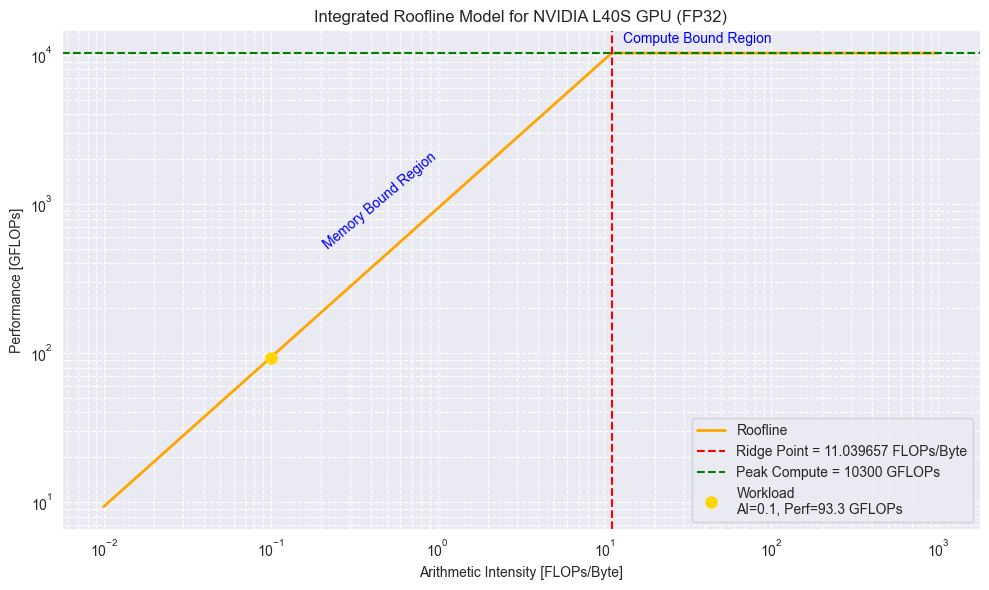

In [132]:
#Graph 5 roofline model for NVIDIA A30 for the best GPU solution
import numpy as np

# Define constants
ridge_point = 11.039657  # FLOPs/Byte
peak_performance = 10300  # GFLOPs

# Create x values (arithmetic intensity)
x = np.logspace(-2, 3, 500)  # From 0.1 to 1000 FLOPs/Byte

# Roofline model: minimum of memory bound and compute bound
memory_bandwidth = peak_performance / ridge_point
y = np.minimum(memory_bandwidth * x, peak_performance)

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(x, y, label='Roofline', color='orange', linewidth=2)

# Ridge point line
plt.axvline(x=ridge_point, color='red', linestyle='--', label=f'Ridge Point = {ridge_point} FLOPs/Byte')

# Peak compute line
plt.axhline(y=peak_performance, color='green', linestyle='--', label=f'Peak Compute = {peak_performance} GFLOPs')

# GEMM workload point
plt.plot(0.1, 93.3, 'o', color='gold', markersize=8, label=f'Workload\nAI={0.1}, Perf={93.3} GFLOPs')

# Annotate regions
plt.text(0.2, 1e3 - 500, 'Memory Bound Region', rotation=40, color='blue')
plt.text(13, 1e4 + 2000, 'Compute Bound Region', rotation=0, color='blue')

# Labels and title
plt.xlabel('Arithmetic Intensity [FLOPs/Byte]')
plt.ylabel('Performance [GFLOPs]')
plt.title('Integrated Roofline Model for NVIDIA A30 GPU (FP32)')
plt.legend()
plt.grid(True, which="both", ls="--")

# Show the plot
plt.tight_layout()
plt.show()

In [131]:
#Graph_1 nm
# Set random seed for reproducibility
'''np.random.seed(42)

# Generate random sample data
num_points = 100
data = pd.DataFrame({
    'id': np.random.choice(['A', 'B', 'C', 'D'], size=num_points),
    'n': np.random.randint(100, 10000, size=num_points),
    'm': np.random.randint(100, 10000, size=num_points),
    'mu': np.random.rand(num_points) * 100  # use as size of scatter plot points
})'''

data = pd.read_csv('GPU/test/GPU_test_G1.csv')
dataC = pd.read_csv('CPU/test/CPU_test_G1.csv')


dfo = pd.DataFrame(data)
dfoC = pd.DataFrame(dataC)
#print(df)


#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)

fig, axes = plt.subplots(2, 3, figsize=(30, 12))

fields_to_plot = ["COO1", "COO2", "COO3", "COO4", "COO5"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

i = 0

for ax, field, color in zip(axes.flatten(), fields_to_plot,colors):
    df= dfo[dfo["nonZeros"] == 100000]
    df = df[df["id"] == field]
    pivot_df = df.pivot_table(index="n", columns="id", values="mu",
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(18, 9), color=color)
    ax.set_title(f"GPU: nm vs mu with {field}")
    ax.set_xlabel("")
    #ax.set_ylabel("mu")
    ax.yaxis.set_visible(False)
    ax.legend().remove()

df= dfoC[dfoC["nonZeros"] == 100000]
df = df[df["id"] == "COO"]
pivot_df = df.pivot_table(index="n", columns="id", values="mu",
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
#sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
pivot_df.plot(kind="bar",ax=axes[1,2], figsize=(18, 9), color="white")
axes[1,2].set_title(f"CPU: nm vs mu")
axes[1,2].set_xlabel("")
#ax.set_ylabel("mu")
axes[1,2].yaxis.set_visible(False)
axes[1,2].legend().remove()


#pivot_df.sort_index(inplace=True)

# Plot without legend
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'GPU/test/GPU_test_G1.csv'

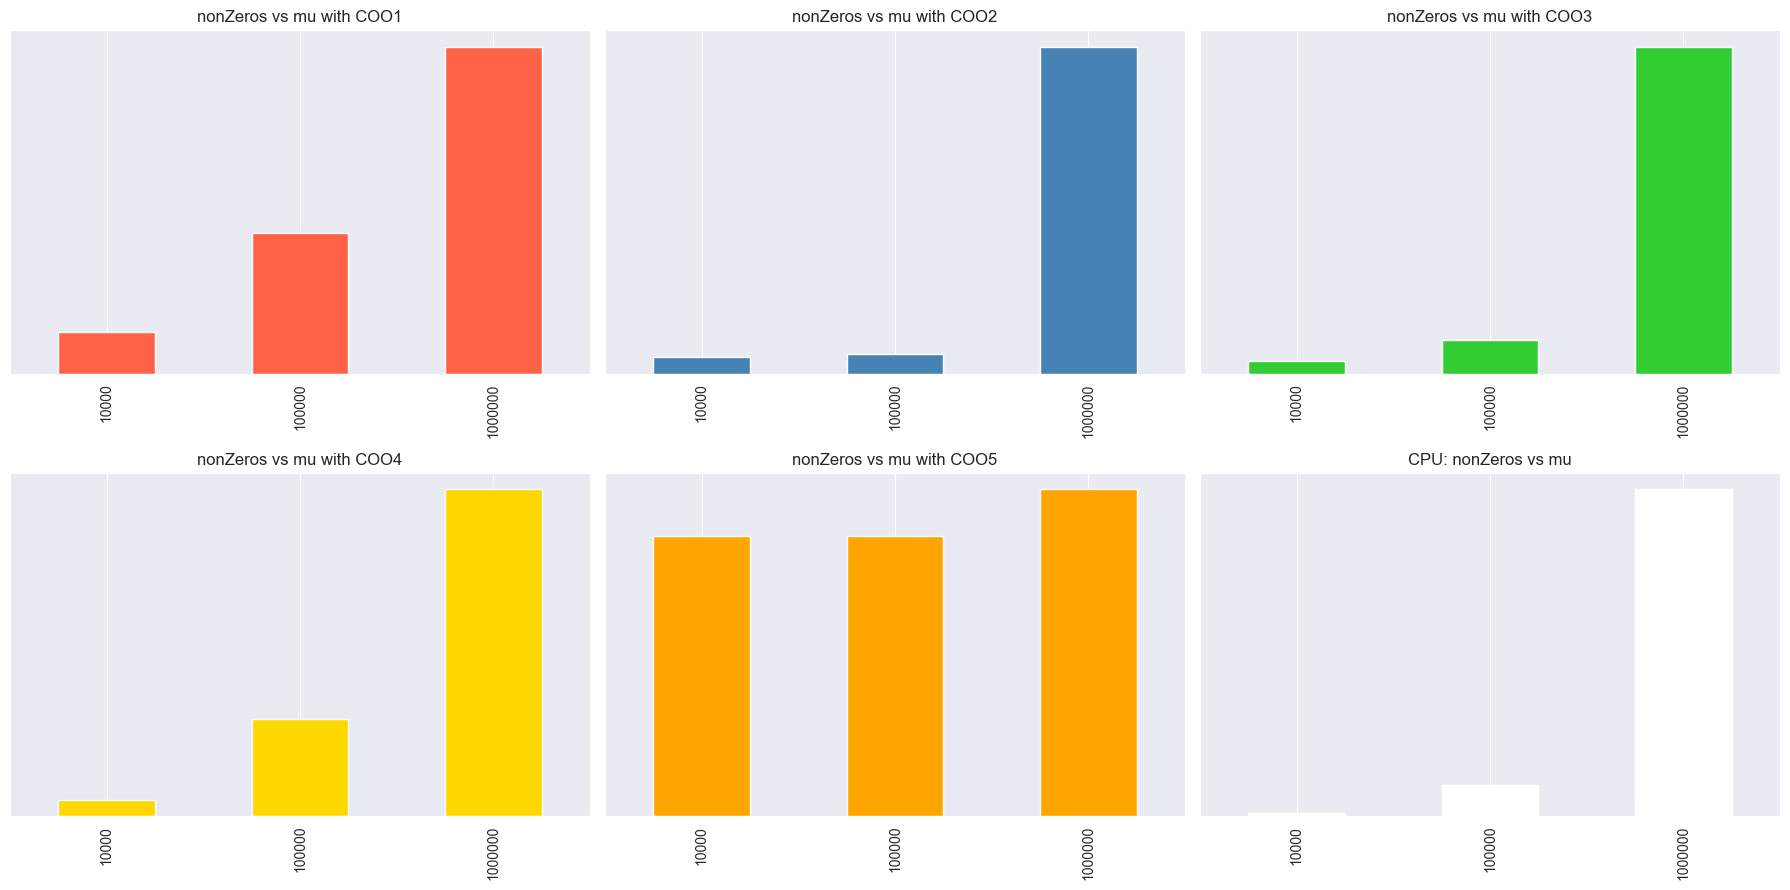

In [15]:
#Graph_1 nonZeros


dataC = pd.read_csv('CPU/test/CPU_test_G1.csv')
dfoC = pd.DataFrame(dataC)
data = pd.read_csv('GPU/test/GPU_test_G1.csv')
dfo = pd.DataFrame(data)
#print(df)

#pivot_df = df.pivot(index="id", columns="nonZeros", values="mu").fillna(0)

fig, axes = plt.subplots(2, 3, figsize=(30, 12))
fields_to_plot = ["COO1", "COO2", "COO3", "COO4", "COO5"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

i = 0

for ax, field, color in zip(axes.flatten(), fields_to_plot,colors):
    df= dfo[dfo["n"] == 100000]
    df = df[df["id"] == field]
    pivot_df = df.pivot_table(index="nonZeros", columns="id", values="mu",
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(18, 9), color=color)
    ax.set_title(f"GPU: nonZeros vs mu with {field}")
    ax.set_xlabel("")
    #ax.set_ylabel("mu")
    ax.yaxis.set_visible(False)
    ax.set_ylabel("mu")
    ax.legend().remove()

df= dfoC[dfoC["n"] == 100000]
df = df[df["id"] == "COO"]
pivot_df = df.pivot_table(index="nonZeros", columns="id", values="mu",
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
#sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
pivot_df.plot(kind="bar",ax=axes[1,2], figsize=(18, 9), color="white")
axes[1,2].set_title(f"CPU: nonZeros vs mu")
axes[1,2].set_xlabel("")
#ax.set_ylabel("mu")
axes[1,2].yaxis.set_visible(False)
axes[1,2].legend().remove()


#pivot_df.sort_index(inplace=True)

# Plot without legend
plt.tight_layout()
plt.show()

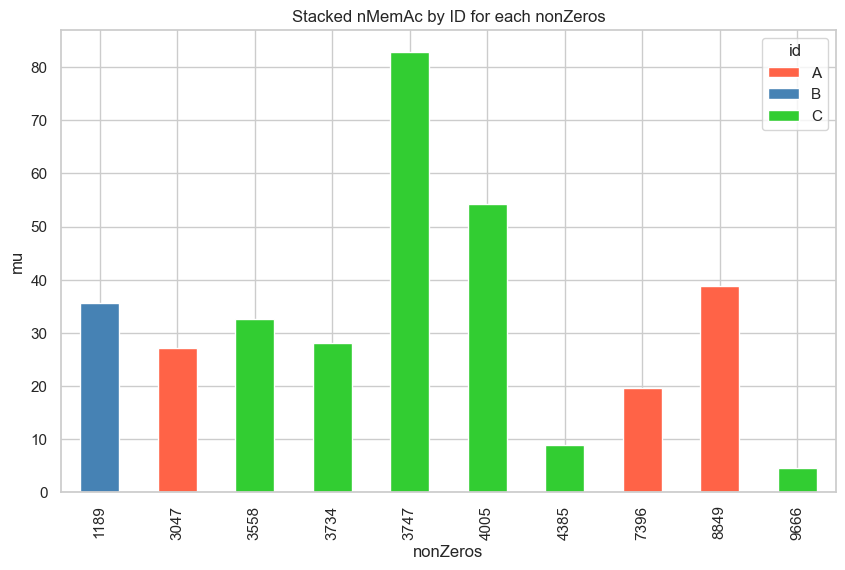

In [33]:
#Graph_2
# Generate a sample dataset
np.random.seed(42)
num_samples = 10
data = pd.DataFrame({
    'platf': [f'platf_{i}' for i in range(num_samples)],
    'id': np.random.choice(['A', 'B', 'C'], size=num_samples),
    'n': np.random.randint(100, 1000, size=num_samples),
    'm': np.random.randint(100, 1000, size=num_samples),
    'nonZeros': np.random.randint(1000, 10000, size=num_samples),
    'Rand': np.random.rand(num_samples),
    'memCopy': np.random.rand(num_samples),
    'sort': np.random.rand(num_samples),
    'mu': np.random.rand(num_samples) * 100,
    'sigma': np.random.rand(num_samples),
    'nflop': np.random.randint(10000, 100000, size=num_samples),
    'nMemAc': np.random.randint(10000, 100000, size=num_samples),
    'AI_O': np.random.rand(num_samples),
    'AI_A': np.random.rand(num_samples),
    'AI': np.random.rand(num_samples),
    'Iper': np.random.rand(num_samples),
    'flops': np.random.rand(num_samples) * 1e9,
    'effBand': np.random.rand(num_samples),
    'RP': np.random.rand(num_samples)
})

colors = ['#FF6347', '#4682B4', '#32CD32']

pivot_df = data.pivot(index="nonZeros", columns="id", values="mu").fillna(0)
pivot_df.sort_index(inplace=True)

# Plot without legend
pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), color=colors)
plt.title("Stacked nMemAc by ID for each nonZeros")
plt.xlabel("nonZeros")
plt.ylabel("mu")


plt.show()

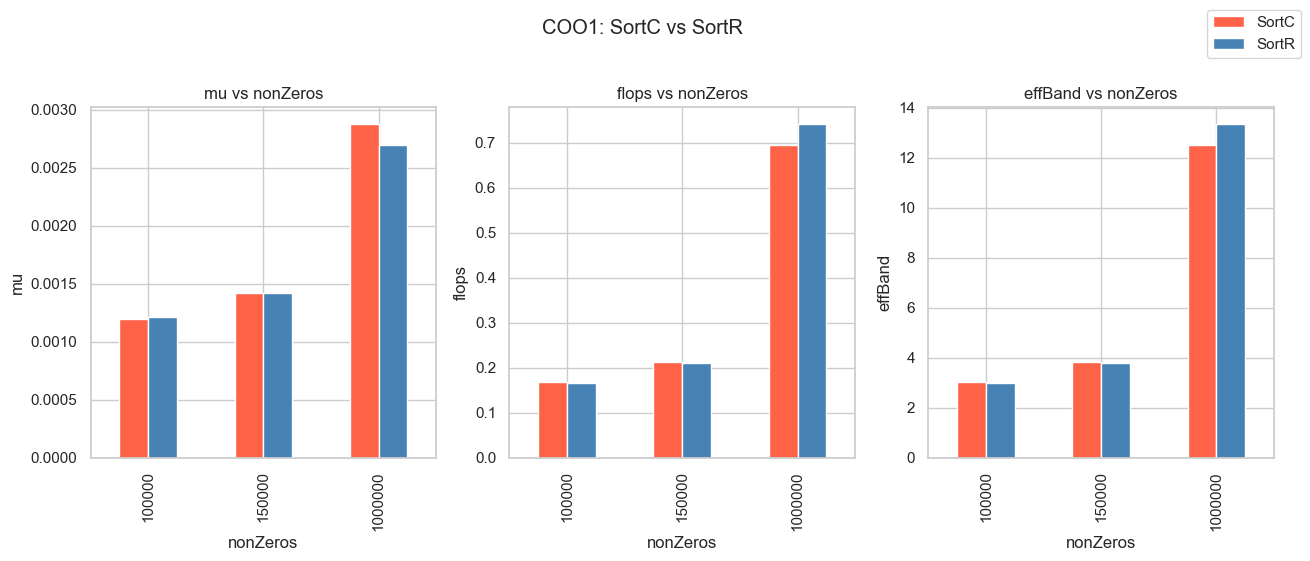

In [31]:
#Graph_2 COO1
# Sample Data
dataC = pd.read_csv('CPU/test/CPU_test_G2.csv')
data = pd.read_csv('GPU/test/GPU_test_G2.csv')

df = pd.DataFrame(data)
df = df[df["id"] == "COO1"]

# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
fields_to_plot = ["mu","flops","effBand"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

for ax, field in zip(axes.flatten(), fields_to_plot):

    pivot_df = df.pivot_table(index="nonZeros", columns="sort", values=field,
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    ax.set_title(f"{field} vs nonZeros")
    ax.set_xlabel("nonZeros")
    ax.set_ylabel(field)
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO1: SortC vs SortR",y=1.1)
plt.legend(bbox_to_anchor=(0.1, 0.3, 1, 1))
plt.show()

#SORTR

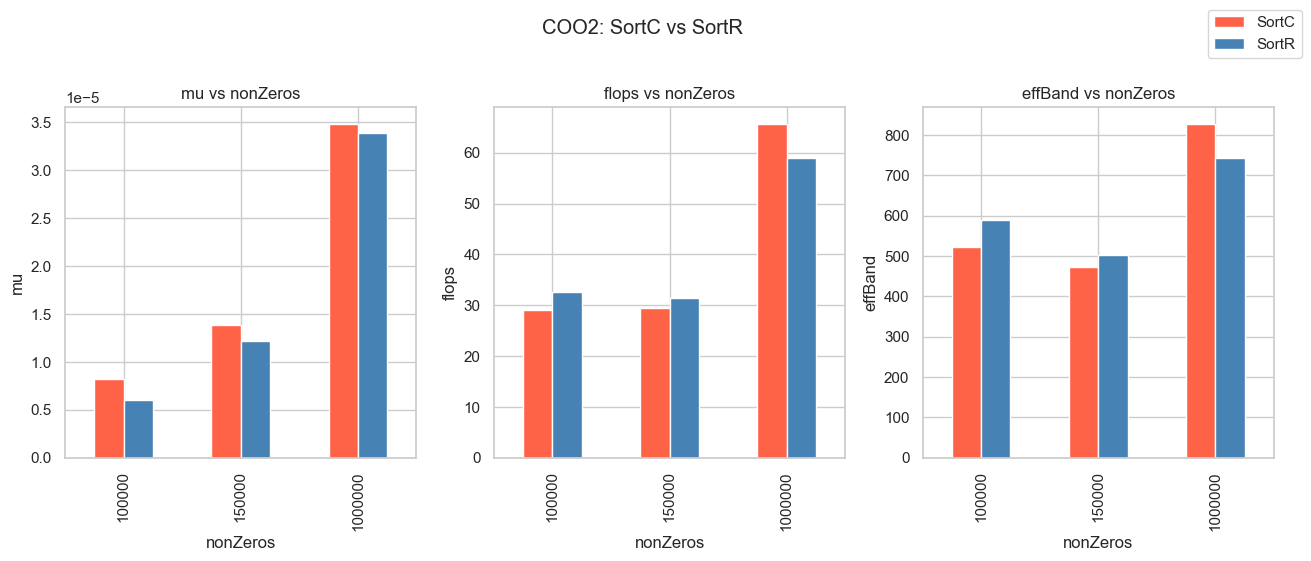

In [32]:
#Graph_2 COO2
# Sample Data

df = pd.DataFrame(data)
df = df[df["id"] == "COO2"]

# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
fields_to_plot = ["mu","flops","effBand"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

for ax, field in zip(axes.flatten(), fields_to_plot):

    pivot_df = df.pivot_table(index="nonZeros", columns="sort", values=field,
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    ax.set_title(f"{field} vs nonZeros")
    ax.set_xlabel("nonZeros")
    ax.set_ylabel(field)
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO2: SortC vs SortR",y=1.1)
plt.legend(bbox_to_anchor=(0.1, 0.3, 1, 1))
plt.show()

#SORTR

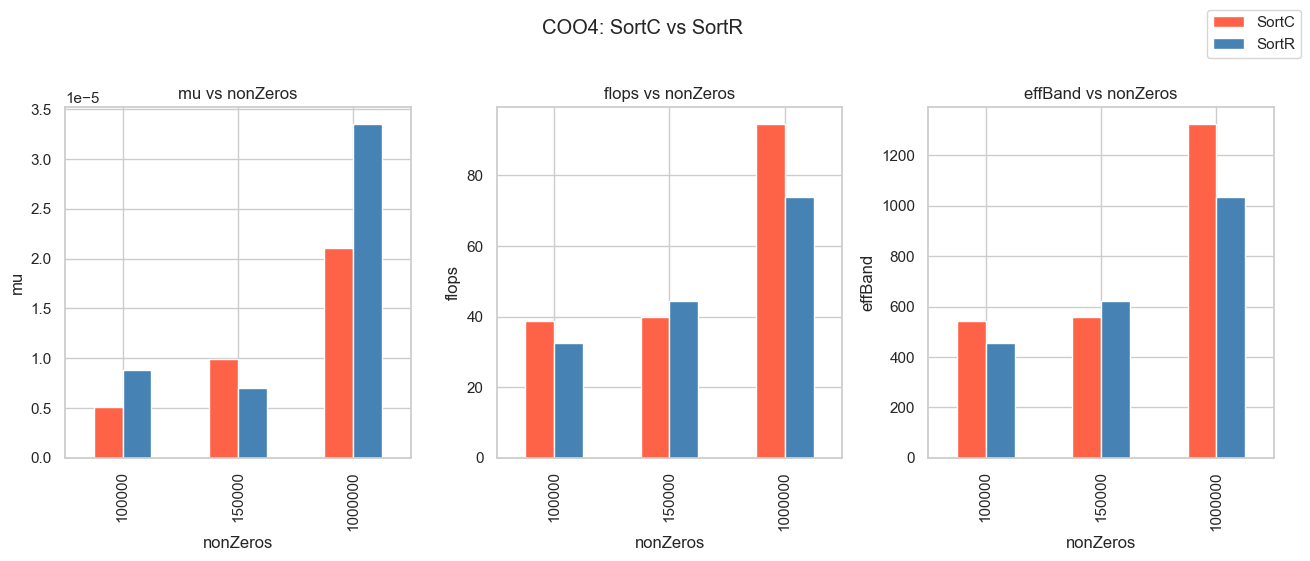

In [33]:
#Graph_2 COO4

df = pd.DataFrame(data)
df = df[df["id"] == "COO4"]

# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
fields_to_plot = ["mu","flops","effBand"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

for ax, field in zip(axes.flatten(), fields_to_plot):

    pivot_df = df.pivot_table(index="nonZeros", columns="sort", values=field,
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    ax.set_title(f"{field} vs nonZeros")
    ax.set_xlabel("nonZeros")
    ax.set_ylabel(field)
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO4: SortC vs SortR",y=1.1)
plt.legend(bbox_to_anchor=(0.1, 0.3, 1, 1))
plt.show()
#SORTC

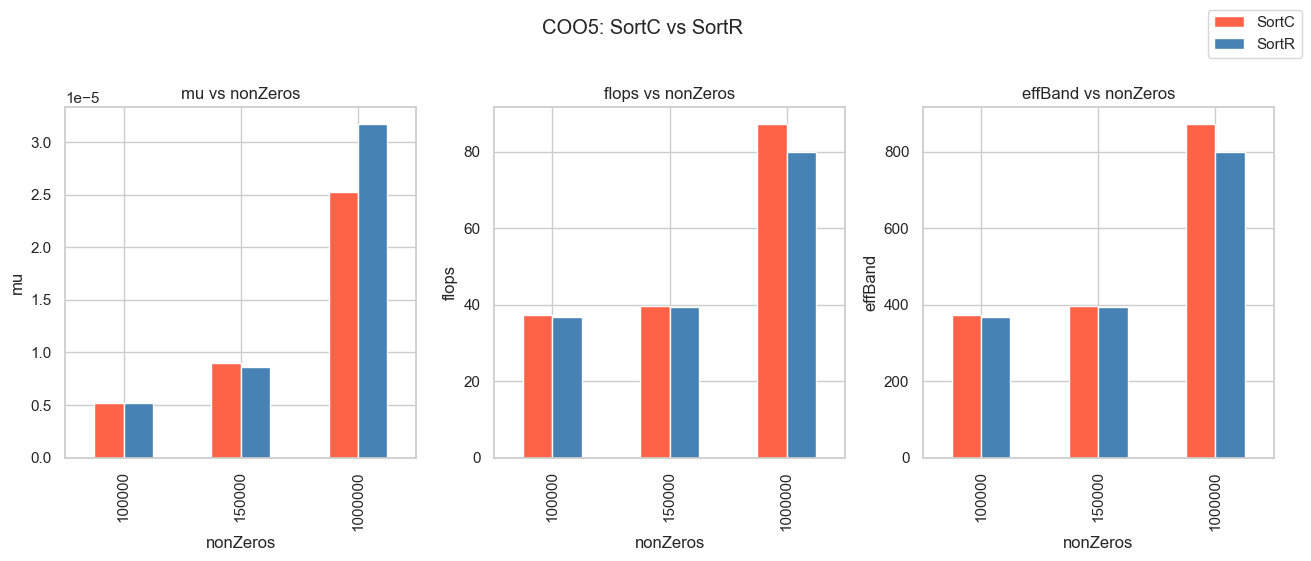

In [34]:
#Graph_2 COO5

df = pd.DataFrame(data)
df = df[df["id"] == "COO5"]

# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
fields_to_plot = ["mu","flops","effBand"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

for ax, field in zip(axes.flatten(), fields_to_plot):

    pivot_df = df.pivot_table(index="nonZeros", columns="sort", values=field,
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    ax.set_title(f"{field} vs nonZeros")
    ax.set_xlabel("nonZeros")
    ax.set_ylabel(field)
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO5: SortC vs SortR",y=1.1)
plt.legend(bbox_to_anchor=(0.1, 0.3, 1, 1))
plt.show()

#SORTC

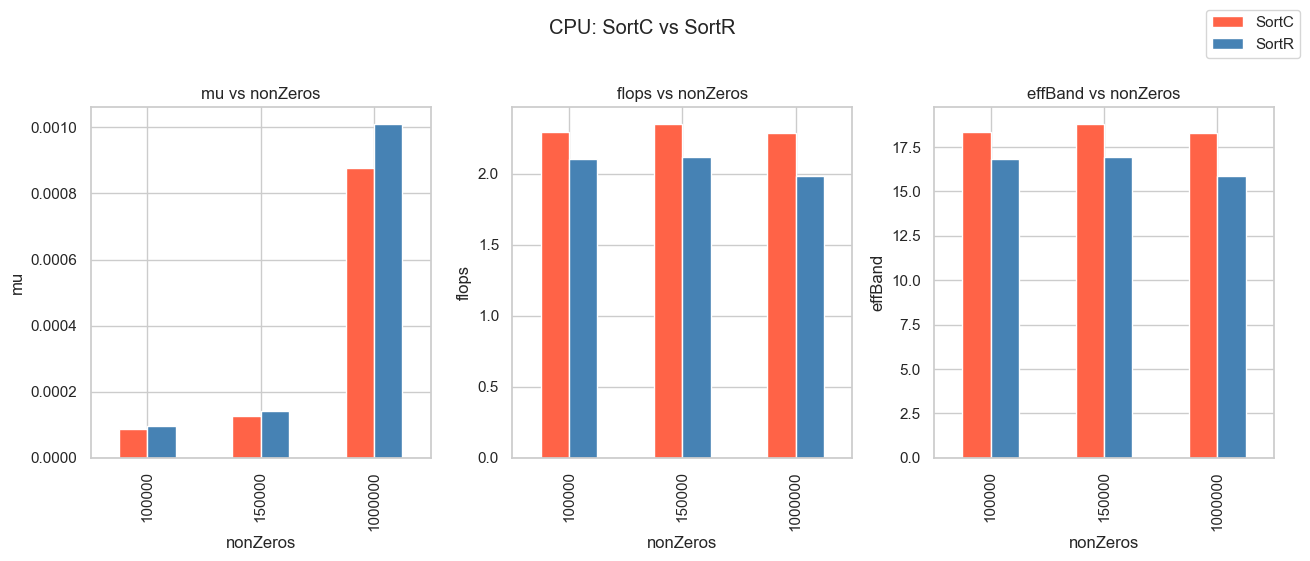

In [35]:
#Graph_2 COO
# Sample Data
data = pd.read_csv('CPU/test/CPU_test_G2.csv')

df = pd.DataFrame(data)

# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(1, 3, figsize=(18, 12))
fields_to_plot = ["mu","flops","effBand"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

for ax, field in zip(axes.flatten(), fields_to_plot):

    pivot_df = df.pivot_table(index="nonZeros", columns="sort", values=field,
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
    ax.set_title(f"{field} vs nonZeros")
    ax.set_xlabel("nonZeros")
    ax.set_ylabel(field)
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("CPU: SortC vs SortR",y=1.1)
plt.legend(bbox_to_anchor=(0.1, 0.3, 1, 1))
plt.show()

#SORTC

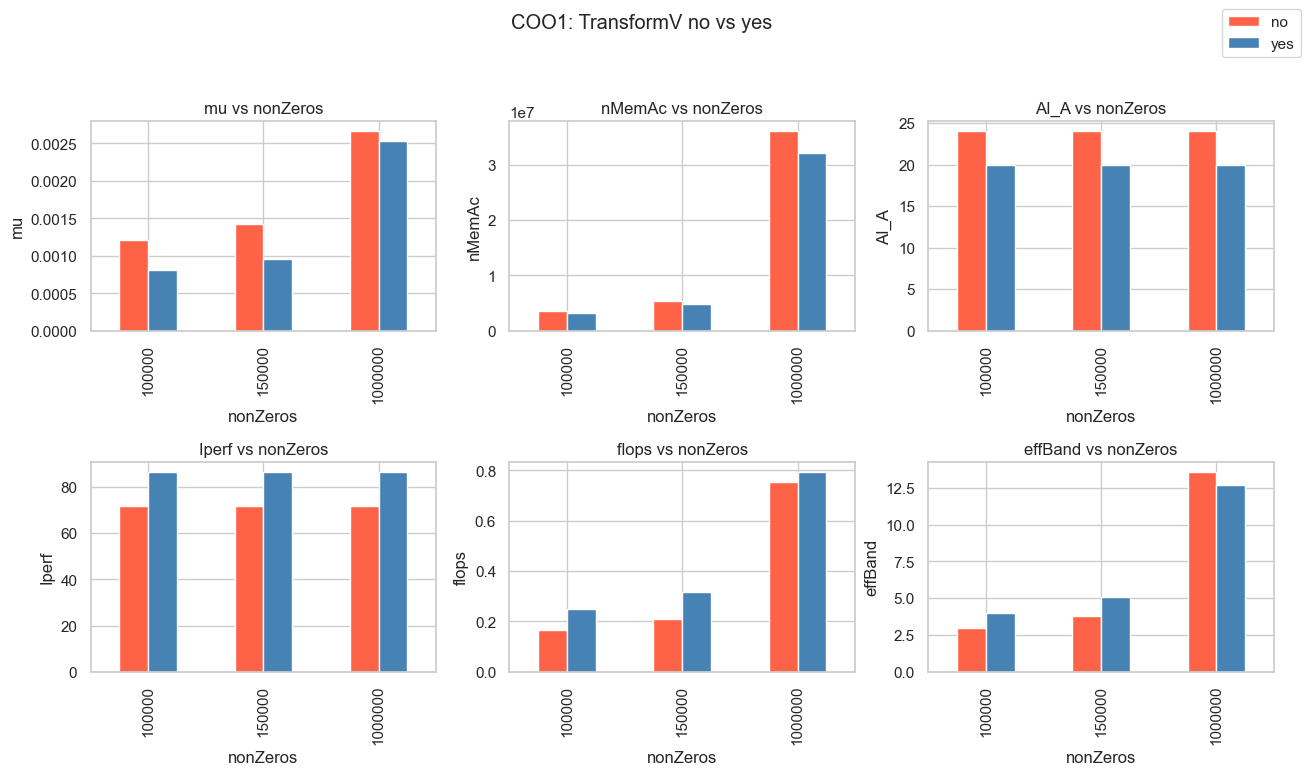

In [42]:
#Graph_3 COO1

dataC = pd.read_csv('CPU/test/CPU_test_G3.csv')
data = pd.read_csv('GPU/test/GPU_test_G3.csv')

df = pd.DataFrame(data)
df = df[df["id"] == "COO1"]

# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fields_to_plot = ["mu","nMemAc","AI_A","Iperf","flops","effBand"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

for ax, field in zip(axes.flatten(), fields_to_plot):

    pivot_df = df.pivot_table(index="nonZeros", columns="TransformV", values=field,
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 7), color=colors)
    ax.set_title(f"{field} vs nonZeros")
    ax.set_xlabel("nonZeros")
    ax.set_ylabel(field)
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO1: TransformV no vs yes",y=1.1)
plt.legend(bbox_to_anchor=(0.1, 2.2, 1, 1))
plt.show()

#yes

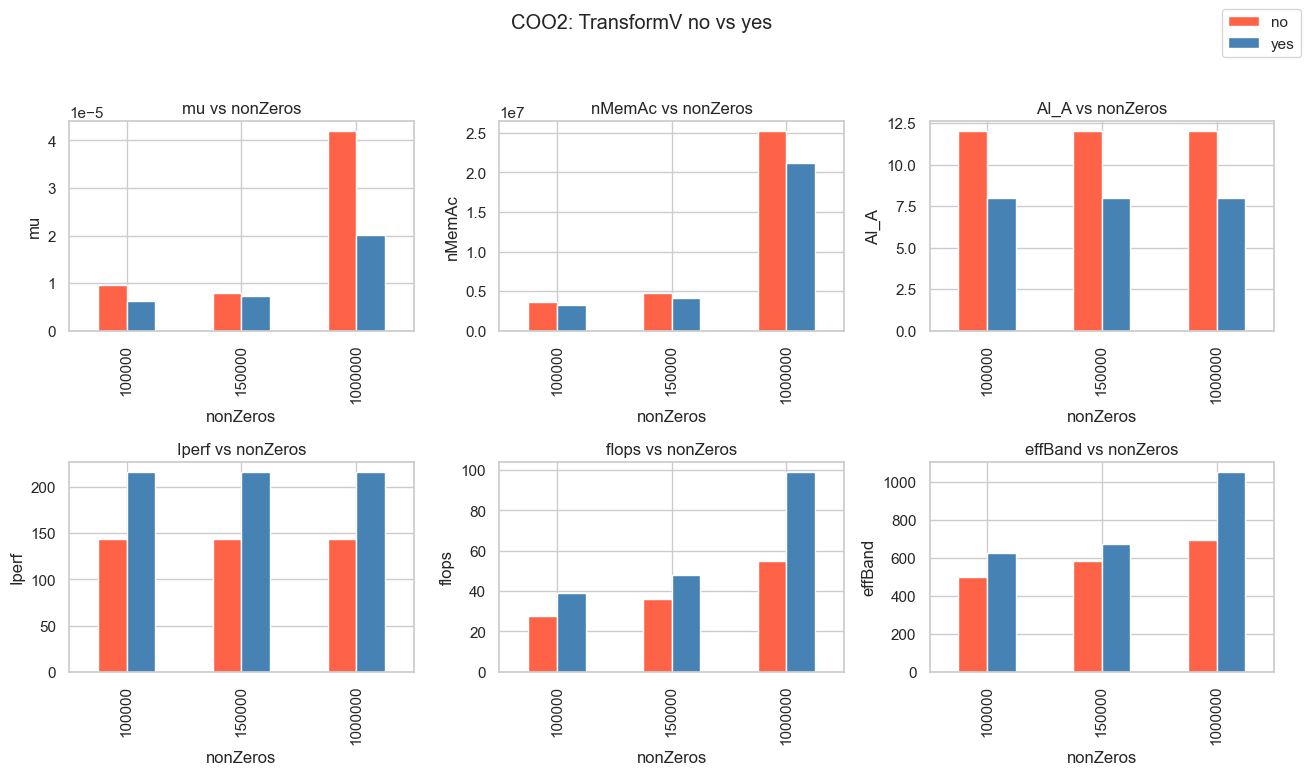

In [43]:
#Graph_3 COO2 selected

df = pd.DataFrame(data)
df = df[df["id"] == "COO2"]

# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fields_to_plot = ["mu","nMemAc","AI_A","Iperf","flops","effBand"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

for ax, field in zip(axes.flatten(), fields_to_plot):

    pivot_df = df.pivot_table(index="nonZeros", columns="TransformV", values=field,
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 7), color=colors)
    ax.set_title(f"{field} vs nonZeros")
    ax.set_xlabel("nonZeros")
    ax.set_ylabel(field)
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO2: TransformV no vs yes",y=1.1)
plt.legend(bbox_to_anchor=(0.1, 2.2, 1, 1))
plt.show()

#yes

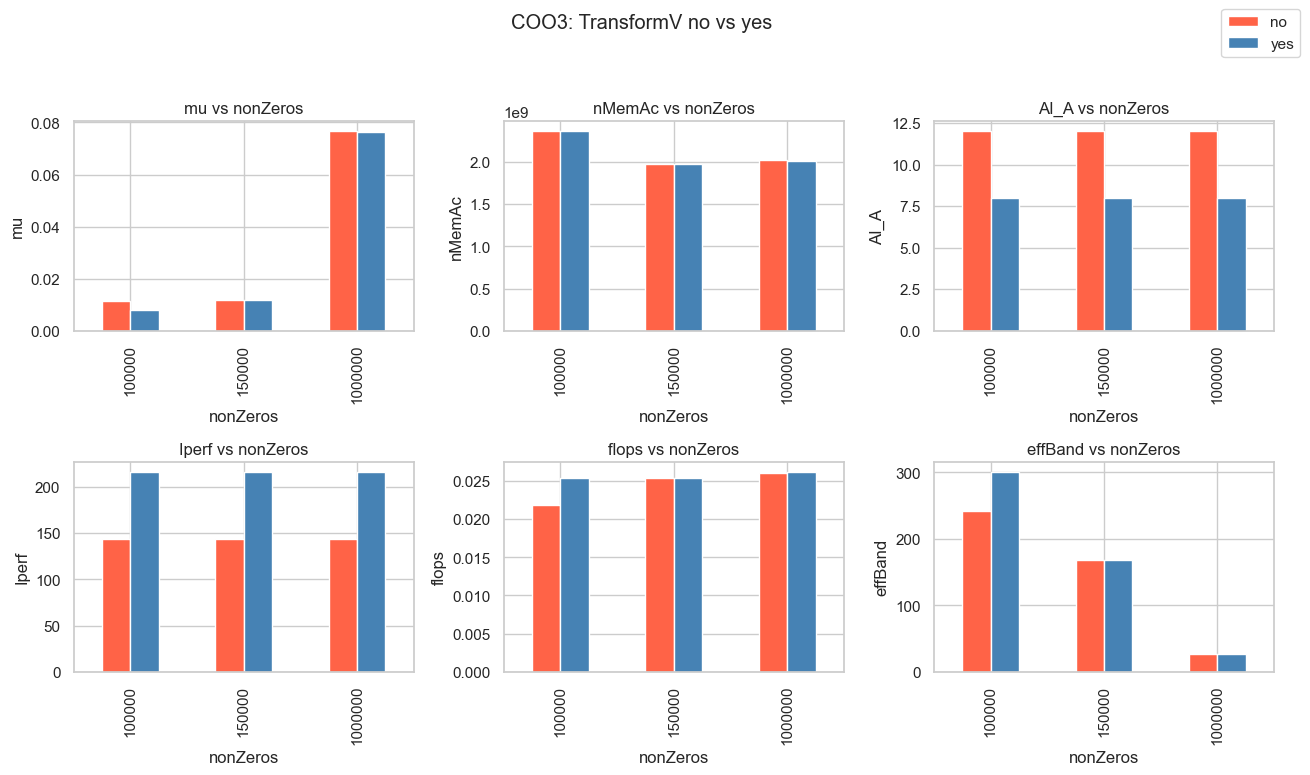

In [44]:
#Graph_3 COO3
df = pd.DataFrame(data)
df = df[df["id"] == "COO3"]


# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fields_to_plot = ["mu","nMemAc","AI_A","Iperf","flops","effBand"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

for ax, field in zip(axes.flatten(), fields_to_plot):

    pivot_df = df.pivot_table(index="nonZeros", columns="TransformV", values=field,
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 7), color=colors)
    ax.set_title(f"{field} vs nonZeros")
    ax.set_xlabel("nonZeros")
    ax.set_ylabel(field)
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO3: TransformV no vs yes",y=1.1)
plt.legend(bbox_to_anchor=(0.1, 2.2, 1, 1))
plt.show()

#yes

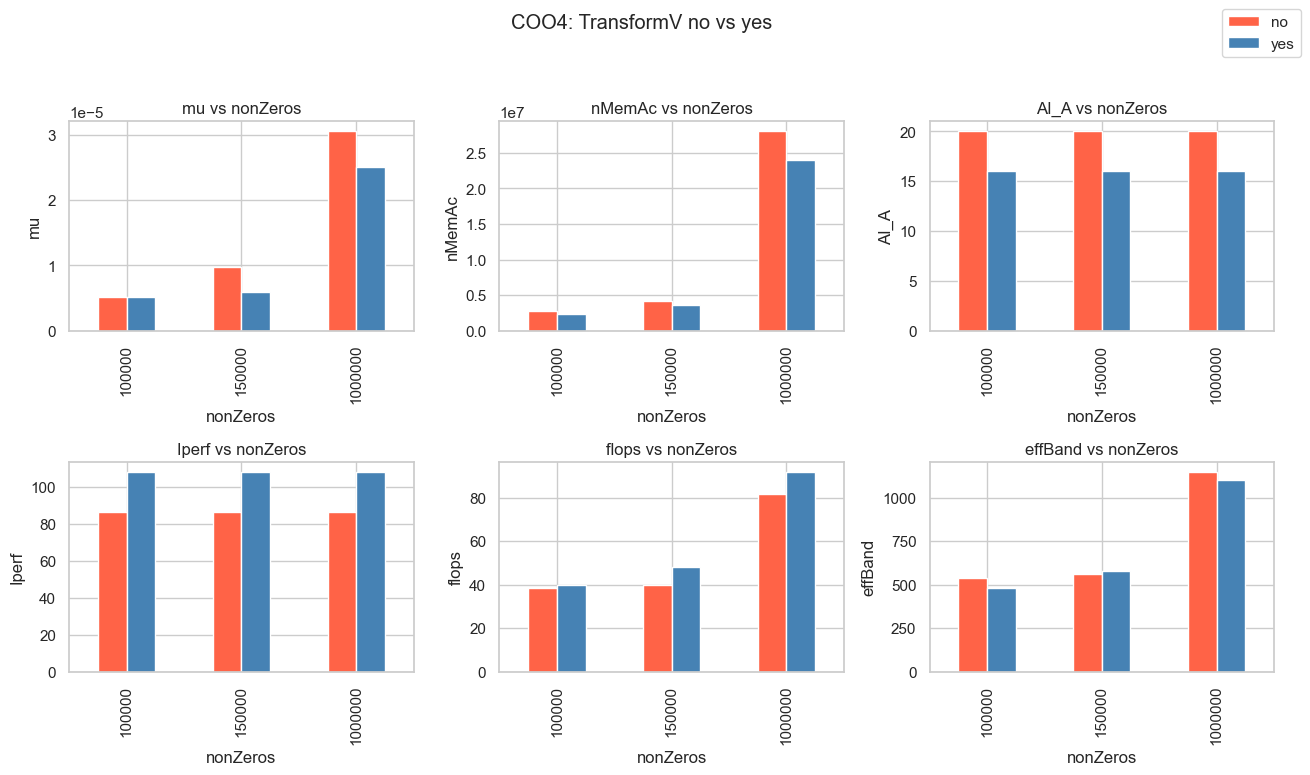

In [48]:
#Graph_3 COO4 selected
df = pd.DataFrame(data)
df = df[df["id"] == "COO4"]


# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fields_to_plot = ["mu","nMemAc","AI_A","Iperf","flops","effBand"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

for ax, field in zip(axes.flatten(), fields_to_plot):

    pivot_df = df.pivot_table(index="nonZeros", columns="TransformV", values=field,
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 7), color=colors)
    ax.set_title(f"{field} vs nonZeros")
    ax.set_xlabel("nonZeros")
    ax.set_ylabel(field)
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO4: TransformV no vs yes",y=1.1)
plt.legend(bbox_to_anchor=(0.1, 2.2, 1, 1))
plt.show()

#yes

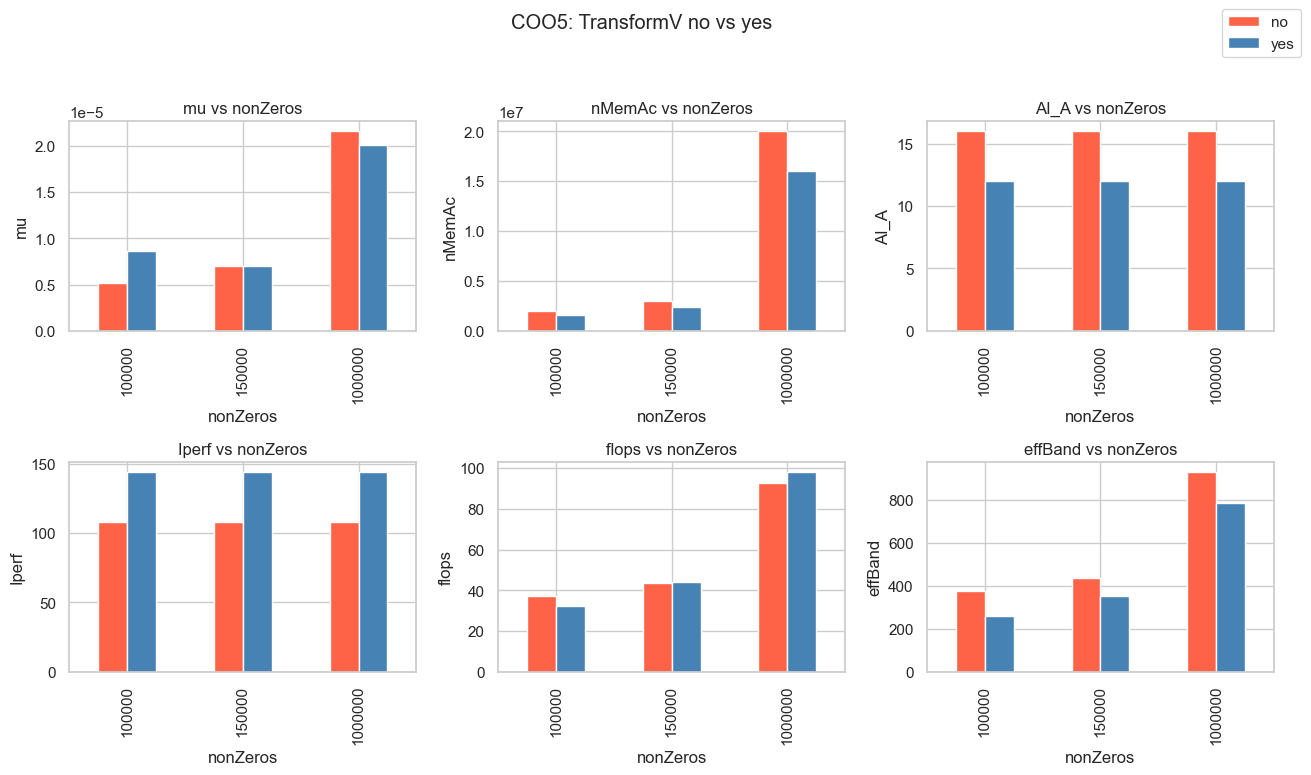

In [49]:
#Graph_3 COO5 selected
df = pd.DataFrame(data)
df = df[df["id"] == "COO5"]


# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fields_to_plot = ["mu","nMemAc","AI_A","Iperf","flops","effBand"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

for ax, field in zip(axes.flatten(), fields_to_plot):

    pivot_df = df.pivot_table(index="nonZeros", columns="TransformV", values=field,
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 7), color=colors)
    ax.set_title(f"{field} vs nonZeros")
    ax.set_xlabel("nonZeros")
    ax.set_ylabel(field)
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("COO5: TransformV no vs yes",y=1.1)
plt.legend(bbox_to_anchor=(0.1, 2.2, 1, 1))
plt.show()

#yes

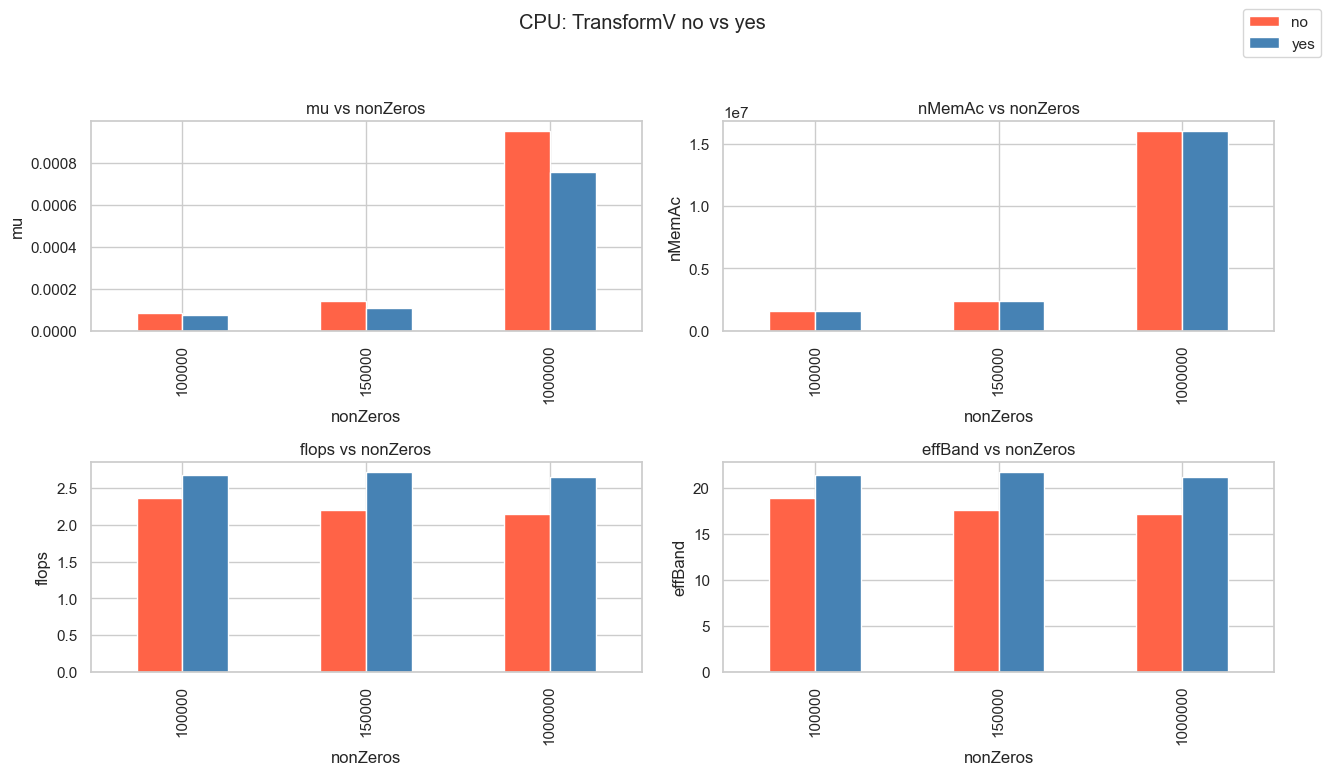

In [51]:
df = pd.DataFrame(dataC)


# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fields_to_plot = ["mu","nMemAc","flops","effBand"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

for ax, field in zip(axes.flatten(), fields_to_plot):

    pivot_df = df.pivot_table(index="nonZeros", columns="TransformV", values=field,
                     aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                     fill_value=0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar",ax=ax, figsize=(13, 7), color=colors)
    ax.set_title(f"{field} vs nonZeros")
    ax.set_xlabel("nonZeros")
    ax.set_ylabel(field)
    ax.legend().remove()

plt.tight_layout()
fig.suptitle("CPU: TransformV no vs yes",y=1.1)
plt.legend(bbox_to_anchor=(0.1, 2.2, 1, 1))
plt.show()

#yes

In [ ]:
#Graph 4 Compare best GPU solutions by mu

#Graph_2 COO1
# Sample Data
data = pd.read_csv('GPU/test/GPU_test_G4.csv')

df = pd.DataFrame(data)

# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
#fig, axes = plt.subplots(1, 3, figsize=(18, 12))

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700','#FFA500']

pivot_df = df.pivot_table(index="nonZeros", columns="id", values="mu",
                 aggfunc='mean',  # or 'sum', 'count', etc. depending on your needs
                 fill_value=0)
#sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
pivot_df.plot(kind="bar",ax=ax, figsize=(13, 5), color=colors)
plt.title(f"mu vs nonZeros by id")
plt.xlabel("nonZeros")
plt.ylabel("mu")
plt.legend().remove()

plt.tight_layout()
#fig.suptitle("COO1: SortC vs SortR",y=1.1)
plt.legend(bbox_to_anchor=(0.1, 0.3, 1, 1))
plt.show()

#SORTR


In [ ]:
#Graph_4
data = {
    "platf": ["P1", "P1", "P2", "P2"],
    "id": ["A", "B", "C", "D"],
    "n": [100, 200, 150, 120],
    "m": [50, 60, 70, 80],
    "nonZeros": [2000, 2100, 1800, 2200],
    "Rand": [0.5, 0.6, 0.7, 0.4],
    "memCopy": [1.2, 1.4, 1.3, 1.1],
    "sort": [0.3, 0.4, 0.5, 0.2],
    "mu": [0.8, 0.9, 1.0, 0.7],
    "sigma": [0.1, 0.2, 0.3, 0.15],
    "nflop": [300, 350, 320, 280],
    "nMemAc": [500, 600, 550, 480],
    "AI_O": [2.0, 2.1, 1.9, 1.8],
    "AI_A": [1.5, 1.6, 1.4, 1.3],
    "AI": [1.7, 1.8, 1.6, 1.5],
    "Iper": [1.1, 1.2, 1.3, 1.0],
    "flops": [400, 450, 420, 390],
    "effBand": [2.5, 2.8, 2.6, 2.3],
    "RP": [0.9, 1.0, 0.95, 0.85]
}

df = pd.DataFrame(data)

# Setting up the plot style
sns.set(style="whitegrid")

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fields_to_plot = ["nflop", "nMemAc", "flops", "effBand", "RP"]

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']

for ax, field in zip(axes.flatten(), fields_to_plot):
    pivot_df = df.pivot(index="nonZeros", columns="id", values=field).fillna(0)
    #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
    pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
    pivot_df.plot(kind="bar", stacked=True,ax=ax, figsize=(10, 6), color=colors)
    ax.set_title(f"Comparison of {field} by nonZeros")
    ax.set_xlabel("nonZeros")
    ax.set_ylabel(field)
    ax.legend().remove()

plt.tight_layout()
plt.show()

Text(0, 0.5, 'mu')

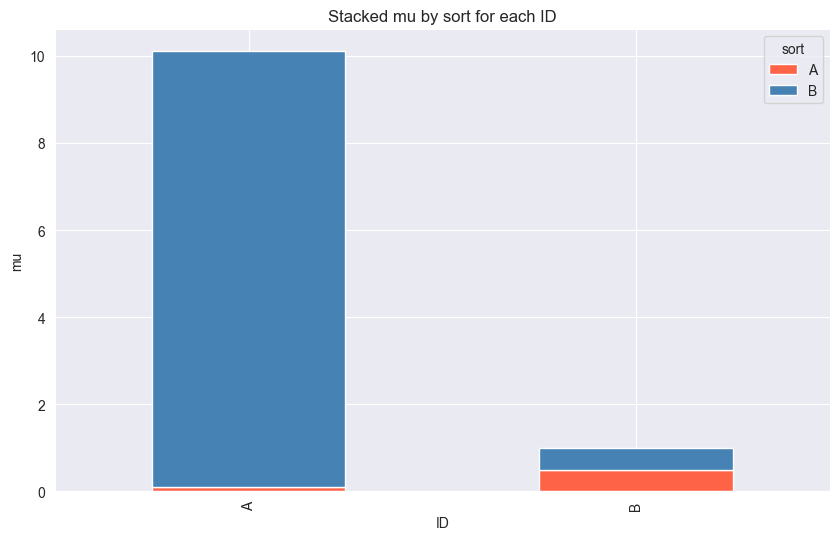

In [38]:
#Graph_6
# Generate a sample dataset
data = {
    "platf": ["P1", "P1", "P2", "P2"],
    "id": ["A", "B", "B", "A",],
    "n": [100, 200, 150, 120],
    "m": [50, 60, 70, 80],
    "nonZeros": [2000, 2100, 1800, 2200],
    "Rand": [0.5, 0.6, 0.7, 0.4],
    "memCopy": [1.2, 1.4, 1.3, 1.1],
    "sort": ["A", "B","A","B"],
    "mu": [0.1, 0.5, 0.5, 10],
    "sigma": [0.1, 0.2, 0.3, 0.15],
    "nflop": [300, 350, 320, 280],
    "nMemAc": [500, 600, 550, 480],
    "AI_O": [2.0, 2.1, 1.9, 1.8],
    "AI_A": [1.5, 1.6, 1.4, 1.3],
    "AI": [1.7, 1.8, 1.6, 1.5],
    "Iper": [1.1, 1.2, 1.3, 1.0],
    "flops": [400, 450, 420, 390],
    "effBand": [2.5, 2.8, 2.6, 2.3],
    "RP": [0.9, 1.0, 0.95, 0.85]
}

df = pd.DataFrame(data)

colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']

pivot_df = df.pivot(index="id", columns="sort", values="mu").fillna(0)
pivot_df.sort_index(inplace=True)

# Plot without legend
pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), color=colors)
plt.title("Stacked mu by sort for each ID")
plt.xlabel("ID")
plt.ylabel("mu")

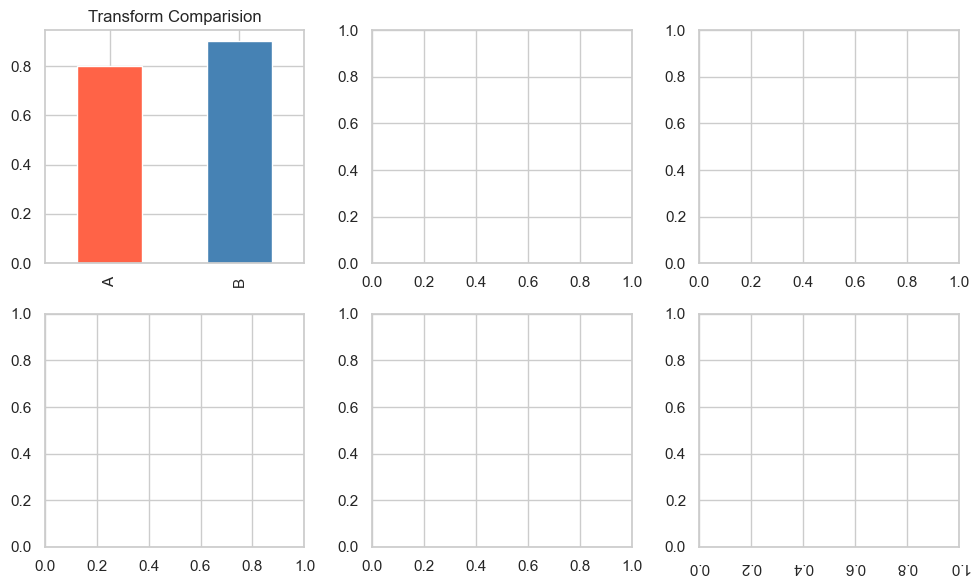

In [66]:
#Graph_7
# Generate a sample dataset
data = {
    "platf": ["P1", "P1", "P2", "P2"],
    "id": ["A", "B", "C", "D",],
    "n": [100, 200, 150, 120],
    "m": [50, 60, 70, 80],
    "nonZeros": [2000, 2100, 1800, 2200],
    "Rand": [0.5, 0.6, 0.7, 0.4],
    "memCopy": [1.2, 1.4, 1.3, 1.1],
    "sort": ["A", "B","A","B"],
    "mu": [0.8, 0.9, 1.0, 0.7],
    "sigma": [0.1, 0.2, 0.3, 0.15],
    "nflop": [300, 350, 320, 280],
    "nMemAc": [500, 600, 550, 480],
    "AI_O": [2.0, 2.1, 1.9, 1.8],
    "AI_A": [1.5, 1.6, 1.4, 1.3],
    "AI": [1.7, 1.8, 1.6, 1.5],
    "Iper": [1.1, 1.2, 1.3, 1.0],
    "flops": [400, 450, 420, 390],
    "effBand": [2.5, 2.8, 2.6, 2.3],
    "RP": [0.9, 1.0, 0.95, 0.85]
}

df = pd.DataFrame(data)


colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']

# Creating a grouped bar plot to compare different fields by 'id'
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for n,ax in enumerate(axes.flatten()):
    if n==0:
        df_1 = df[(df["id"] == "A") | (df["id"] == "B")]
        pivot_df = df_1.pivot( index="id",columns="nonZeros", values="mu").fillna(0)
        #sns.barplot(x="nonZeros", y=field, data=df, ax=ax,hue='id', palette="viridis")
        pivot_df.sort_index(inplace=True)  # Optional: sort x-axis
        pivot_df.plot(kind="bar", stacked=True,ax=ax, figsize=(10, 6), color=colors)
        ax.set_title(f"Transform Comparision")
        ax.set_xlabel("",rotation=0)
        ax.legend().remove()
plt.tight_layout()
plt.show()